In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 25)
import pickle
with open('data_with_coord_29_04_21', "rb") as fh:
    df = pickle.load(fh)
# On retire les données dont l'incident est à plus de 150 km de Londre
df = df[df.dist_euclidian<150000]

In [2]:
def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=15)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
#format_ax(ax)

Info pour voir combien de lignes et de colonnes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797003 entries, 0 to 1797003
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IncidentNumber            object 
 1   TimeMobilised             object 
 2   TimeMobile                object 
 3   TimeArrived               object 
 4   AttendanceTimeSeconds     float64
 5   DeployedFromStation_Name  object 
 6   DelayCodeID               float64
 7   DelayCode_Description     object 
 8   IncidentGroup             object 
 9   DateOfCall                object 
 10  CalYear                   int64  
 11  TimeOfCall                object 
 12  HourOfCall                int64  
 13  Easting_rounded           int64  
 14  Northing_rounded          int64  
 15  color                     object 
 16  d_long                    float64
 17  d_lat                     float64
 18  x_utm                     float64
 19  y_utm                     float64
 20  o_long                  

In [4]:
df.isnull().sum()

IncidentNumber              0
TimeMobilised               0
TimeMobile                  0
TimeArrived                 0
AttendanceTimeSeconds       0
DeployedFromStation_Name    0
DelayCodeID                 0
DelayCode_Description       0
IncidentGroup               0
DateOfCall                  0
CalYear                     0
TimeOfCall                  0
HourOfCall                  0
Easting_rounded             0
Northing_rounded            0
color                       0
d_long                      0
d_lat                       0
x_utm                       0
y_utm                       0
o_long                      0
o_lat                       0
o_x_utm                     0
o_y_utm                     0
dist_euclidian              0
dtype: int64

Calcul de la distance entre chaque caserne et le centre de Londre et répartition en  4 quartiles pour faciliter leur études comme variable explicative

In [5]:
import numpy as np
def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):
    '''
    from https://stackoverflow.com/questions/57178783/how-to-plot-latitude-and-longitude-in-bokeh
    Cette fonction calcule les coordonnées
    UTM (mercator) à partir de la longitude et de la latitude
    df : le dataframe où se trouvent les données à convertir
    lon : nom de la colonne pour les longitudes
    lat : nom de la colonne pour les latitudes
    return : retourne le dataframe en y ajoutant les colonnes
    pour les coordonnées x_utm et y_utm
    '''
    k = 6378137 # rayon de la Terre en mètres
    df.loc[:, "x_utm"] = df.loc[:, lon] * (k * np.pi/180.0)
    df.loc[:, "y_utm"] = np.log(np.tan((90 + df.loc[:, lat]) * np.pi/360.0)) * k
    return df
london = pd.DataFrame([[51.509093, -0.094151]], columns=['LAT','LON'])
london = wgs84_to_web_mercator(london)
london



,LAT,LON,x_utm,y_utm
0,51.509093,-0.094151,-10480.841378,6.711845e+06


In [6]:
# On utilise les longitudes et latitudes des stations moins les long et lat du centre de Londres
df['dist_center'] = np.sqrt((df.x_utm - -10480.841378)**2 + (df.y_utm - 6.711845e+06)**2)

In [7]:
df['dist_stacen_classe']=pd.qcut(x=df.dist_center, q=6, labels=[1,2,3,4,5,6]).astype('float')
df['dist_stacen_bin']=pd.qcut(x=df.dist_center, q=6)

In [8]:
df.head()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,TimeOfCall,...,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian,dist_center,dist_stacen_classe,dist_stacen_bin
0,235138081,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,342.0,Clapham,0.0,RAS,Special Service,01-janv-09,2009,00:00:37,...,-0.148916,51.475992,-16577.246612,6.705927e+06,-0.141051,51.465400,-15701.725496,6.704034e+06,2085.533280,8496.378017,2.0,"(7154.937, 11462.041]"
1,2091,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,308.0,Edmonton,0.0,RAS,Fire,01-janv-09,2009,00:03:00,...,-0.068836,51.632970,-7662.804053,6.734032e+06,-0.069120,51.627217,-7694.403204,6.733000e+06,1032.257024,22365.168354,5.0,"(21111.379, 28217.718]"
2,3091,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,210.0,Hillingdon,0.0,RAS,Fire,01-janv-09,2009,00:04:27,...,-0.447902,51.534284,-49860.215886,6.716352e+06,-0.451701,51.531257,-50283.125311,6.715810e+06,687.205480,39636.463005,6.0,"(28217.718, 133521.334]"
3,5091,01/01/2009 00:06:04,01/01/2009 00:08:26,01/01/2009 00:10:14,250.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,00:05:39,...,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,7880.037236,2.0,"(7154.937, 11462.041]"
4,5091,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,233.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,00:05:39,...,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,7880.037236,2.0,"(7154.937, 11462.041]"


On affiche ici la distribution des valeurs pour remplir le tableau demandé

In [9]:
df.describe()

,AttendanceTimeSeconds,DelayCodeID,CalYear,HourOfCall,Easting_rounded,Northing_rounded,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian,dist_center,dist_stacen_classe
count,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06
mean,4.011574e+02,2.773378e+00,2.014444e+03,1.351363e+01,5.305245e+05,1.805104e+05,-1.205793e-01,5.150837e+01,-1.342283e+04,6.711725e+06,-1.204801e-01,5.150825e+01,-1.341179e+04,6.711702e+06,3.029837e+03,1.734705e+04,3.499936e+00
std,5.360889e+02,4.862935e+00,3.566042e+00,6.300112e+00,9.834912e+03,7.422533e+03,1.418392e-01,6.660432e-02,1.578947e+04,1.191031e+04,1.396091e-01,6.507531e-02,1.554121e+04,1.163703e+04,2.431196e+03,9.945466e+03,1.707836e+00
min,1.000000e+00,0.000000e+00,2.009000e+03,0.000000e+00,4.598500e+05,1.457500e+05,-1.141720e+00,5.119234e+01,-1.270957e+05,6.655387e+06,-4.586300e-01,5.131373e+01,-5.105446e+04,6.676978e+06,8.631572e+00,3.681147e+01,1.000000e+00
25%,2.560000e+02,0.000000e+00,2.011000e+03,9.000000e+00,5.250500e+05,1.760500e+05,-1.995797e-01,5.146907e+01,-2.221711e+04,6.704691e+06,-2.013300e-01,5.146746e+01,-2.241195e+04,6.704403e+06,1.582225e+03,9.263569e+03,2.000000e+00
50%,3.330000e+02,0.000000e+00,2.014000e+03,1.400000e+01,5.307500e+05,1.810500e+05,-1.168314e-01,5.151381e+01,-1.300561e+04,6.712688e+06,-1.215590e-01,5.151249e+01,-1.353189e+04,6.712453e+06,2.570357e+03,1.574287e+04,3.000000e+00
75%,4.350000e+02,5.000000e+00,2.018000e+03,1.900000e+01,5.362500e+05,1.853500e+05,-3.765835e-02,5.155157e+01,-4.192108e+03,6.719447e+06,-4.318400e-02,5.155296e+01,-4.807221e+03,6.719694e+06,3.872109e+03,2.447051e+04,5.000000e+00
max,1.194990e+05,1.800000e+01,2.021000e+03,2.300000e+01,5.948500e+05,2.345500e+05,8.099769e-01,5.200504e+01,9.016621e+04,6.801036e+06,2.329000e-01,5.166028e+01,2.592631e+04,6.738931e+06,1.093304e+05,1.335213e+05,6.000000e+00


Pour les graphs à venir on va drop les colonnes utm et dist center qui ne nous intéressent pas spécialement vu que nous avons la distance euclidienne et les classes

In [10]:
df.drop(['dist_center','o_y_utm', 'o_x_utm','o_lat', 'o_long', 'y_utm', 'x_utm', 'd_lat', 'd_long'], axis = 1, inplace = True)

In [11]:
df.drop(['Easting_rounded', 'Northing_rounded'], axis = 1, inplace = True)

In [12]:
#plus que 233mo restant c'est pas mal allégé hahaha
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797003 entries, 0 to 1797003
Data columns (total 17 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   IncidentNumber            object  
 1   TimeMobilised             object  
 2   TimeMobile                object  
 3   TimeArrived               object  
 4   AttendanceTimeSeconds     float64 
 5   DeployedFromStation_Name  object  
 6   DelayCodeID               float64 
 7   DelayCode_Description     object  
 8   IncidentGroup             object  
 9   DateOfCall                object  
 10  CalYear                   int64   
 11  TimeOfCall                object  
 12  HourOfCall                int64   
 13  color                     object  
 14  dist_euclidian            float64 
 15  dist_stacen_classe        float64 
 16  dist_stacen_bin           category
dtypes: category(1), float64(4), int64(2), object(10)
memory usage: 234.8+ MB


étude de la corrélation entre les variables du df

notre variable cible serait response time

In [13]:
corr=df.corr(method ='pearson')

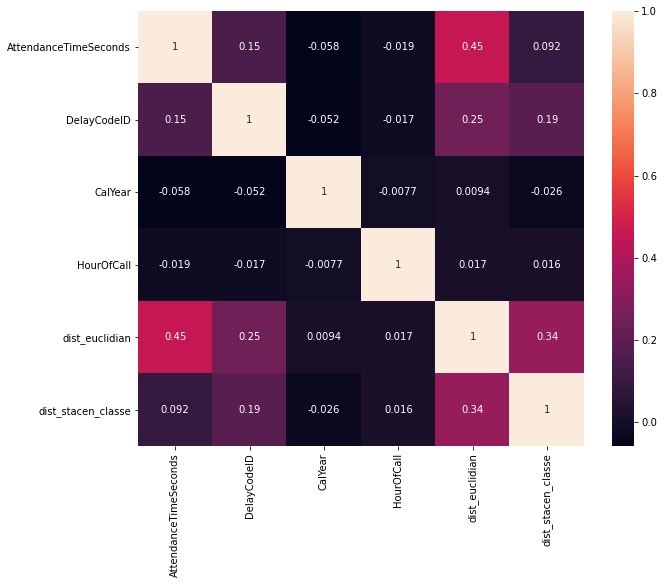

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, ax=ax);

In [15]:
from scipy.stats import pearsonr
t1, t2 = df.AttendanceTimeSeconds, df.dist_euclidian
r, p = pearsonr(t1, t2)
print('corr. Temps-Distance : r = ' ,r, 'P =', p)

t1, t2 = df.AttendanceTimeSeconds, df.DelayCodeID
r, p = pearsonr(t1, t2)
print('corr. Temps-Delay : r = ' ,r, 'P =', p)


corr. Temps-Distance : r =  0.4542829001747806 P = 0.0
corr. Temps-Delay : r =  0.14980489634427513 P = 0.0


### Nous avons donc deux corrélations d'intérêt concernant le temps de réponse:
- la corrélation AttendanceTimeSeconds et Dist_euclidian (P<.05), qui concerne le temps temps de réponse et la distance entre la station et le lieu de l'incident. Cette corrélation est moyenne (0.2<r<0.5) et positive (r>0).
- la corrélation AttendanceTimeSeconds et DelayCodeID (P<.05), qui concerne le temps temps de réponse et la présence ou non de caractéristiques de délai sur le trajet. Cette corrélation est faible (r<0.2) et positive (r>0).

Ces deux corrélations tombent sous le sens, ces caractéristiques pourraient donc être utiles dans le cadre d'une prédiction du temps de trajet entre une station et le lieu de l'incident.

Boxplot sur différentes variables qui peuvent nous intéresser pour trier le ds sur la base des min/max observés

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


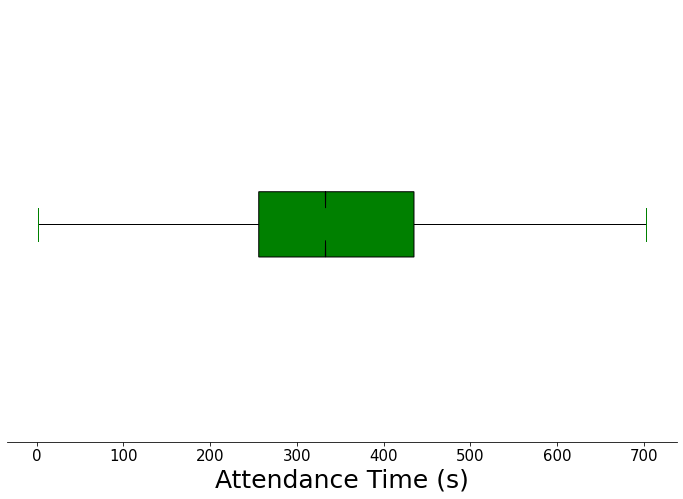

In [16]:
#plt.subplots(figsize=(10, 10))
# on drop ici les fliers qui rendent le graph presque illisble
#ax = sns.boxplot(x = 'AttendanceTimeSeconds', data = df, color = 'green',  showfliers = False)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
c = 'green'
ax.boxplot(df.AttendanceTimeSeconds, notch=True, showfliers =False, vert=False,
           patch_artist=True,
            boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color=c),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks(np.arange(0, 701, 100))
ax.set_xticklabels(np.arange(0, 701, 100), fontsize=20)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Attendance Time (s)', fontsize=25)
format_ax(ax)
plt.savefig('attendance_box.png', dpi=300)

In [17]:
tmean_per_h = df.groupby('HourOfCall').agg({'AttendanceTimeSeconds':'mean'})
tstd_per_h = df.groupby('HourOfCall').agg({'AttendanceTimeSeconds':'std'})
tstd_per_h

,AttendanceTimeSeconds
HourOfCall,
0,721.659295
1,664.559250
2,626.467605
3,623.984802
4,711.163870
5,623.892498
6,623.270745
7,442.511189
8,444.796078


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


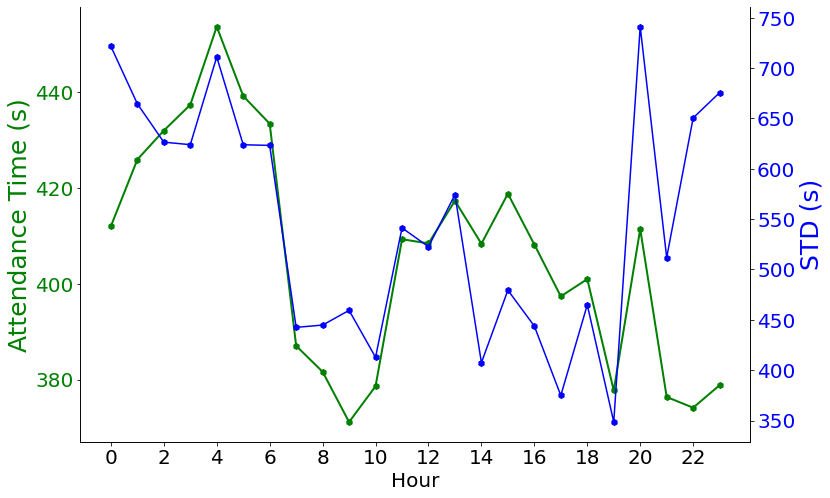

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
#plt.grid(True)
ax.plot( np.arange(0,24,1), tmean_per_h.AttendanceTimeSeconds, "g-h", linewidth=2)
#ax.fill_between( np.arange(0,24,1), tmean_per_h.AttendanceTimeSeconds - tstd_per_h.AttendanceTimeSeconds, 
#                 tmean_per_h.AttendanceTimeSeconds + tstd_per_h.AttendanceTimeSeconds, alpha = 0.2, color = 'green')
ax.set_xticks(np.arange(0,24,2))

ax.set_xlabel('Hour',fontsize = 20)
ax.set_ylabel("Attendance Time (s)", fontsize = 25, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('STD (s)', color='blue', fontsize=25)  # we already handled the x-label with ax1
ax2.plot(np.arange(0,24,1), tstd_per_h.AttendanceTimeSeconds, "b-h")
ax2.tick_params(axis='y', labelcolor=color)

def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=20)
    #axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

format_ax(ax)
format_ax(ax2)
plt.savefig('attendance_hour_line.png', dpi=300)

In [19]:
print(pearsonr(tmean_per_h.AttendanceTimeSeconds, tmean_per_h.AttendanceTimeSeconds))
print("La STD est fortement positivement corrélée à la moyenne, et elle est très importante, ce qui laisse à penser qu'il y a une très grande variabilité dans les interventions")

(1.0, 0.0)
La STD est fortement positivement corrélée à la moyenne, et elle est très importante, ce qui laisse à penser qu'il y a une très grande variabilité dans les interventions


Il est bon également d'étudier l'évolution du temps moyen d'intervetion par année pour voir si les fermetures de stations en 2014 puis 2016 ont eu un impact marqué ou non sur cette variable

In [20]:
tmean_per_year = df.groupby('CalYear').agg({'AttendanceTimeSeconds':'mean'})
tstd_per_year = df.groupby('CalYear').agg({'AttendanceTimeSeconds':'std'})

In [21]:
df.CalYear.value_counts()

2009    167768
2010    166078
2011    156529
2016    154562
2019    152929
2018    151749
2020    149149
2012    148068
2017    146343
2014    140183
2013    138804
2015    113699
2021     11142
Name: CalYear, dtype: int64

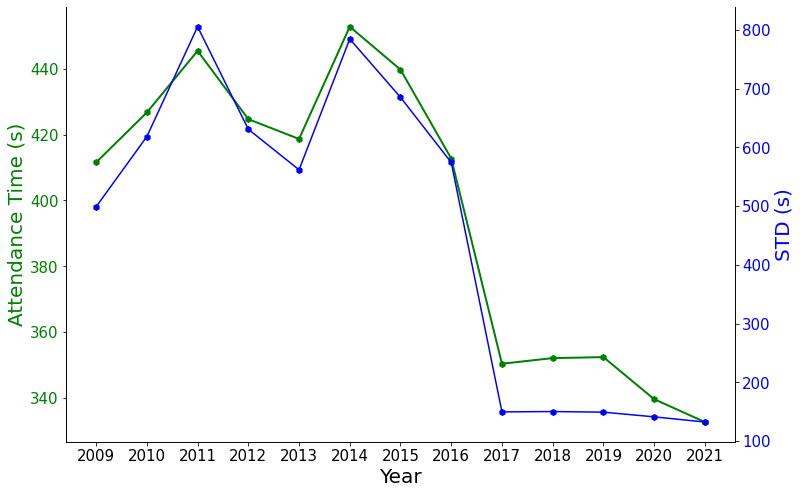

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
#plt.grid(True)
ax.plot( np.arange(2009,2022,1), tmean_per_year.AttendanceTimeSeconds, "g-h", linewidth=2)
#ax.fill_between( np.arange(0,24,1), tmean_per_h.AttendanceTimeSeconds - tstd_per_h.AttendanceTimeSeconds, 
#                 tmean_per_h.AttendanceTimeSeconds + tstd_per_h.AttendanceTimeSeconds, alpha = 0.2, color = 'green')
ax.set_xticks(np.arange(2009,2022,1))
ax.set_xlabel('Year',fontsize = 20)
ax.set_ylabel("Attendance Time (s)", fontsize = 20, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('STD (s)', color='blue', fontsize=20)  # we already handled the x-label with ax1
ax2.plot(np.arange(2009,2022,1), tstd_per_year.AttendanceTimeSeconds, "b-h")
ax2.tick_params(axis='y', labelcolor=color)

def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=15)
    #axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

format_ax(ax)
format_ax(ax2)
plt.savefig('attendance_year_line.png', dpi=300)

In [23]:
print(pearsonr(tmean_per_year.AttendanceTimeSeconds, tstd_per_year.AttendanceTimeSeconds))
print("La STD est très fortement et positivement corrélée à la moyenne, mais toutes deux chutent fortement en 2017 et deviennent stables : les données précédent 2016 ne seraient donc pas représentatives des délai d'intervention de nos jours")

(0.9906283490503935, 7.316065033986606e-11)
La STD est très fortement et positivement corrélée à la moyenne, mais toutes deux chutent fortement en 2017 et deviennent stables : les données précédent 2016 ne seraient donc pas représentatives des délai d'intervention de nos jours


Temps moyen d'intervention en fonction de la distance de la station avec le centre de Londres, pour prendre en compte les différentes densités urbaines, mais également un maillage plus large des zones

In [24]:
dist_resp = df.groupby('dist_stacen_classe' ).agg({'AttendanceTimeSeconds':'mean'})
dist_resp

,AttendanceTimeSeconds
dist_stacen_classe,
1.0,349.616944
2.0,355.667972
3.0,362.109460
4.0,412.251012
5.0,431.133534
6.0,496.177245


36.81
7154.937
11462.041
15742.87
21111.379
28217.718


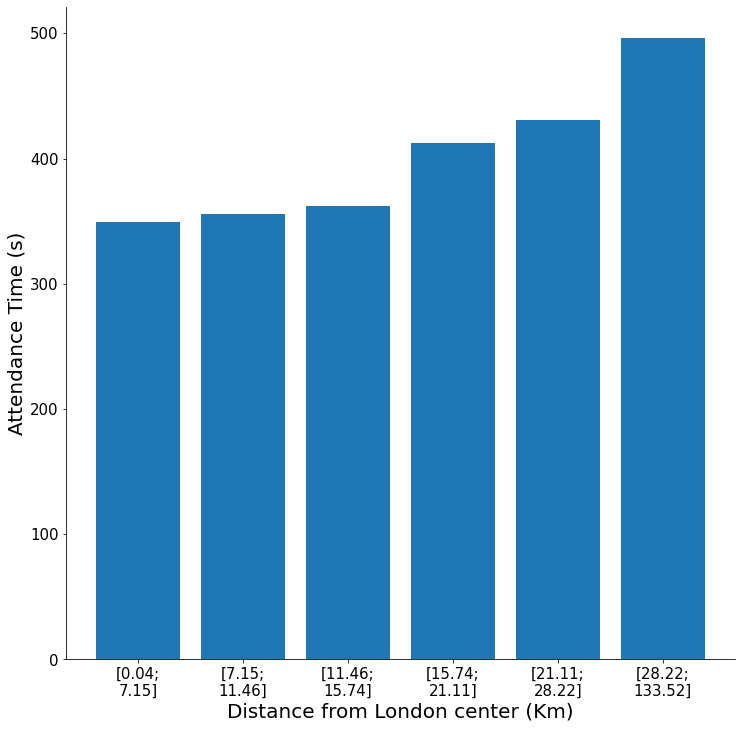

In [25]:
labels = []
for i in df.dist_stacen_bin.sort_values().unique():
    j = str(i).split(',')
    print(j[0].split('(')[1])
    labels.append('['+str(np.round(float(j[0].split('(')[1])/1000, 2))+';\n'+\
                  str(np.round(float(j[1].split(']')[0].split()[0])/1000, 2))+']')
        
fig, ax = plt.subplots(1, 1, figsize = (12,12))
ax.bar(dist_resp.index, dist_resp.AttendanceTimeSeconds)
ax.set_xticks(dist_resp.index)
ax.set_xticklabels(labels)
ax.set_xlabel('Distance from London center (Km)',fontsize = 20)
ax.set_ylabel("Attendance Time (s)", fontsize = 20)
def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=15)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
format_ax(ax)
plt.savefig('attendance_center.png', dpi=300)